---
>「『優れた芸術家はまねをし、偉大な芸術家は盗む』とピカソは言った。
だからすごいと思ってきたさまざまなアイデアをいつも盗んできた。」\
>スティーブ・ジョブズ
---

# 転移学習

一般にデモで凄い！と思わせるようなAIアプリはともかく、シンプルなVGGやResNetといった画像認識でさえ、膨大なデータと計算量が必要である
- フルスクラッチ（ランダム重み）から学習して有効なアプリレベルまで持っていける環境にある、つまりデータに触れる人は一握り

では、あきらめるのか？というと、それに対する一つの答えが**転移学習(Transfer Learning)**である
- DLにおけるエコ、地球にやさしいDL

転移学習とは**大規模データで学習済みのモデルを別のタスクに転移、つまり応用する技術全般を指す**

## 一般的な転移学習の分類

転移学習でできることは、
- 利用したデータセットを流用・転用する
- 利用したモデル（ネットワーク構成）を流用・転用する
- 利用したパラメータを流用・転用する

のいずれかであり、技術的に学ぶべきところは次の点である

- オリジナルモデルの一部を利用する（一部を変更する）にはどうすればよいか
- オリジナルモデルのパラメータの一部を利用する（一部を変更する）にはどうすればよいか

以下、分類について説明するが、何かしら流用・転用するという観点だけ理解していれば、特に触れなくてもよい
- 分類スキルを学びたいわけではないであろうから

### 問題設定に基づく分類

**帰納的転移学習(Inductive Transfer Learning)**

元の変換(ソースタスク)と転移先の変換(ターゲットタスク)が異なる
- 元の特徴量(ソースドメイン)と転移先の特徴量(ターゲットドメイン)が同じか否かは問わない
- ターゲットドメインにラベルが存在する場合に定義可能
- ソースにラベルがある場合は帰納的転移学習、ない場合は**自己教示学習**と呼ぶ

**教師なし転移学習(Unsupervised Transfer Learning)**

ソースタスクとターゲットタスクが異なり、教師なし学習であるクラスタリングや次元削減をターゲットドメインで解く手法
- ソースドメインとターゲットドメインの両方にラベルがない

**トランスダクティブ転移学習(Trunsductive Transfer Learning)**

ソースタスクとターゲットタスクが同一であるが、ドメインが異なる場合の手法

### アプローチに基づく分類

何を転移するかによる分類

**インスタンス転移**

ソースドメインのインスタンス、つまりサンプルや データセットの特定部分について再度重み付けすることで、ターゲットドメインの学習に再利用する

**特徴表現転移**

ソースドメインとターゲットドメインの差や、分類・回帰モデルの誤差を軽減する都合の良い特徴表現を発見し利用する

**パラメータ転移**

ソースモデルとターゲットモデルそれぞれのハイパーパラメータが同一であるという前提のもと、そのパラメータや事前分布を発見し利用する

**関係性のある知識の転移**

ソースモデルにおける結果としてのデータ間の関係性をターゲットドメインに転移し利用する


## ディープラーニングにおける転移学習の分類

**ネットワークベース転移学習**

ソースドメインのネットワーク(モデル)を再利用する手法で、DLにおける転移学習といえば、一般にこの手法を指す

- **事前学習済みネットワークベース転移学習**

 最終層で最終出力が得られるが、その層まではそこに至る特徴を保存しているといえ、この特徴を再利用するために最終層付近のみ重みを再学習する、もしくは、ネットワークを組み替える

- **事前学習済ネットワークの微調整(ファインチューニング)**

 単にファインチューニングと呼ばれることの多い手法で、学習済みネットワークの重みを初期値として、ターゲットドメインでモデル全体の重みを再学習する、もしくは、ネットワークの一部を組み替えて全体を再学習させる
  - 違いは、固定するパラメタがあるかないか

なお、この違いについては、文献などにより様々存在しており、画一的な見解がなく、例えば次のような分類も存在する

- 転移学習
  学習済みモデルの重みは更新せず、このモデルに新たな層を追加、この追加した層のみ学習させ重みを更新する

- ファインチューニング
  学習済みモデルの一部の重みを更新せず、主に後段の層の重みを更新しつつ、追加した層も学習により重みを更新する

この分類は「層を追加する」という観点で異なるが、いずれの場合も、「ファインチューニングの方が更新対象範囲が広い」という観点で類似している


**インスタンスベース転移学習**

ソースドメインのインスタンス、つまりサンプルやデータセットの特定部分について再重み付けすることで、ターゲットドメインの学習に再利用する

- 先に示したインスタンス転移を行うこと

**地図ベース転移学習**

ソースドメインとターゲットドメインのインスタンスを新しいデータ空間にマッピングして利用すること

**敵対ベース転移学習**

GANを活用しソースドメインとターゲットドメインの両方に適用可能で転移可能な表現を見つけ出して利用すること
- ソースドメインとターゲットドメインそれぞれから特徴量を抽出し、GANのDescriminator(識別ネットワーク)でどちらのドメインに属する特徴量かを判別させる
  - 判定精度が低ければ、両ドメインの特徴量の差が小さく、転送性が良いと判断する
  - 判別性能が高い場合は、特徴量の差が大きく、転送性が低いと判断する

なお、以下の関連用語についてもここで纏めて奥

**蒸留(Distillation)**

大容量かつ深いモデルで学んだ知識を蒸留、すなわち縮約し、小さく軽量なモデルの学習に活用すること

**マルチタスク学習**

ソースとターゲットを区別せず、共有層を含む複数のタスクを同時に学習させること

## 転移学習のメリット・デメリット

**メリット**

- ある領域(ドメイン)で学習したモデルを別の領域に適用するため、サンプル数が限定されている場合でも比較的高精度なモデルを構築できる

  - 高品質なデータを大量に取得することは、コスト的・時間的に難しい場合が多い
  - 大量かつ高品質なデータによって学習した質の高いモデル・知識領域を転移させることで、限定的なデータであっても高精度なモデルを構築できる可能性がある

- モデルを短時間で構成

  - 事前学習済みネットワークを利用する場合は、0から学習する必要がないため学習時間・コストを短縮できる

- シミュレーター環境で訓練したモデルを現実に適応させる

- これらの背景にはすでに学んだが、DNNにおいては、タスク共通の主要な特徴があり、これを共通化できるという特徴を利用している
  - 特に画像認識などの領域ではスタイルトランスファーのように、大きくとらえる・細かくとらえるといった認識範囲や粒度の特徴をうまく活用できる可能性がある

**デメリット**

- 転移が必ず精度改善などよい結果を生むとは限らない
  - **負の転移(negative transfer)**と呼ばれる状況が発生しうる





# 転移学習の実際

代表的な事前学習済みネットワークベース転移学習について学ぶ

- ファインチューニング(全パラメタを再学習)と、一般的な転移学習(入れ替えた層だけ学習)の二つを試す

- PyTorchでは、Alexnet、VGG、ResNet、SqueezeNet、Inception v3などの代表的なネットワークが利用でき、これら性能の高い学習済みモデルを利用する

ここでは、ImageNetで学習した1000クラスの分類モデルを用いて、ウルトラマンの中でも、ウルトラマンと帰ってきたウルトラマンほどではないが、それなりに難しい分類、ウルトラマンタロウとウルトラマンレオの分類を行う

In [1]:
cuda = "cuda:0"
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import torchvision
from torchvision import datasets, models, transforms
import os
import time
import copy
import numpy as np
import matplotlib.pyplot as plt
device = torch.device(cuda if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


今回分類するのは、ウルトラマンタロウとウルトラマンレオである。

ウルトラマンタロウとウルトラマンレオを分類するモデルを学習するための**少数の**画像を入手する

知らない人はぱっと見で見分けるのが難しいといわれるが、頭の角に注目すると、横に伸びるのがレオ、縦に曲がってとがっているのがタロウであり、特に太郎は真ん中の角も目立つ
- その他、胸のパターンが違うなど、よく見るとかなり違う



In [2]:
if not os.path.exists('ultra.tar.gz'):
  !wget "https://drive.google.com/uc?export=download&id=1Oo-YhK2FTuqKMAAWkjwcVFjSJL9sXB6p" -O ultra.tar.gz
  !tar xzf ultra.tar.gz

--2025-12-07 06:27:53--  https://drive.google.com/uc?export=download&id=1Oo-YhK2FTuqKMAAWkjwcVFjSJL9sXB6p
Resolving drive.google.com (drive.google.com)... 142.251.10.101, 142.251.10.138, 142.251.10.102, ...
Connecting to drive.google.com (drive.google.com)|142.251.10.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Oo-YhK2FTuqKMAAWkjwcVFjSJL9sXB6p&export=download [following]
--2025-12-07 06:27:54--  https://drive.usercontent.google.com/download?id=1Oo-YhK2FTuqKMAAWkjwcVFjSJL9sXB6p&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.24.132, 2404:6800:4003:c03::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.24.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3710587 (3.5M) [application/octet-stream]
Saving to: ‘ultra.tar.gz’

ultra.tar.gz        100%[===================>]   3.54M  --.-KB/s    

画像認識では、ネットワークの前段の方で、人間のニューロンが備えるようなある固定の形状に特異的に反応するニューロンクラスタが生成されているのではないかという仮説があり、このことの実験的解析・証明も行われた

- レオは237枚、タロウはどちらかというと人気が高いので集まりやすく289枚ある。なお、手作業で仕訳けているので多少のミスが混入している可能性がある
  - データセットの修正大歓迎

フルスクラッチで学習するには不十分な枚数であるが、転移学習であれば十分可能な枚数である

今回の目標は、
- 学習済みImageNetを転移学習する
- ImageNet自体も蟻とハチの分類が可能であるが、転移学習により、その分類精度を向上させる
  - 今回はタロウとレオしか最後に判定しない(他が判定できないようにする)

なお、PyTorchのチュートリアルには、ハチと蟻の分類があり、これに関して多くの参考例が存在する
- この場合は、オリジナルの1000のクラスにハチと蟻が既に含まれているため、もともと分類できているハチと蟻の分類精度を向上することになる
- 含まれているが、精度が向上すればよいという考えは次の疑問に対して答える必要がある
  - 1000のクラスがありました
  - ハチと蟻はそのまま正解するでしょう
  - ハチと蟻しかないのであるから、ハチと蟻以外の残り998クラスに分類された絵に対して、各クラスの画像がハチと蟻、どちらに近いかだけ与えてしまえば、精度は向上するというクイックハックが想定できる
  - それよりも向上した、ということが示されなければ、**転移学習のネットワーク組み換えにより本当によくなったといえないのではないか？**
  - さらに、向上しても1000クラスから2クラスになるのだから、間違えても確率半分であり、この点でも疑問がある
- 本来は1000のクラスに**含まれない**データを扱うべき

今回はウルトラマンなので、このような疑問を挟む余地はない


## 展開フォルダから画像をロード

PyTorchのImageFolderを用いてデータをロードする
- 画像データはPIL形式で読み込む必要がある
  - 画像フォルダからデータをPIL形式で読み込むにはtorchvision.datasets.ImageFolderを利用する
  - 既に習得済みのtransform機能がImageFolderにも存在し、データ拡張を行う変換関数群を指定できる
  - クラス名のサブフォルダ(train/leo, train/taro)を作成しておくと自動的にクラス(leo, taro)を割り付けることができる
    - ラベルはフォルダの順番に0, 1, 2, ...と割り当てられるため、leoが0、taroが1となる

この関数は全画像データをまとめてメモリにロードして処理せず、逐次処理するように設計されており、大量かつ巨大な画像ファイルがあっても問題ない

まずは、試しにデータをよみだし、データ数を確認する

In [3]:
image_dataset = datasets.ImageFolder(root="ultra")
image, label = image_dataset[0]

一番最初の画像と自動的に振られたラベル(レオが0、タロウが1)を確認する

**ウルトラマンが嫌いな人には本当に申し訳ない**
- アリとハチよりはよいと思う
  - アリとハチの大量の拡大画像はグロいからいやだという意見があった
- 正解しているのか不正解なのかの判別ができないかもしれない。

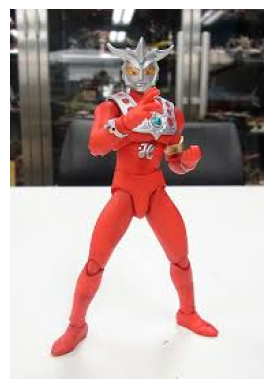

In [4]:
plt.figure()
plt.axis("off")
plt.imshow(image)

## データ拡張

PyTorchにはさまざまなデータ拡張機能があるが、今回以下の機能を利用する
- 既に紹介済みの機能も改めて紹介する

### RandomResizedCrop

PIL画像をランダムなサイズとアスペクト比にクロップする
- 実行ボタンを押すと、毎回異なる部位が現れる

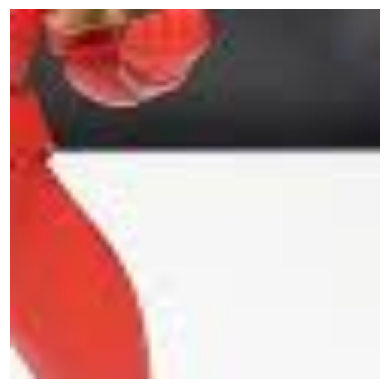

In [5]:
t = transforms.RandomResizedCrop(224)
trans_image = t(image)
plt.figure()
plt.axis("off")
plt.imshow(trans_image)

### RandomHorizontalFlip

与えられたPIL画像を0.5の確率でランダムに水平反転させる

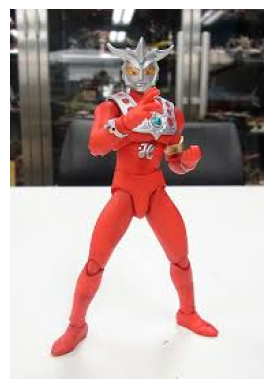

In [6]:
t = transforms.RandomHorizontalFlip()
trans_image = t(image)
plt.figure()
plt.axis("off")
plt.imshow(trans_image)

### Resize

PIL画像を指定されたサイズにリサイズする

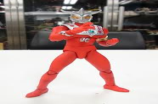

In [7]:
t = transforms.Resize((int(torch.rand(1).item()*200+50), int(torch.rand(1).item()*200+50)))
trans_image = t(image)
trans_image

### CenterCrop

PIL画像を中央でトリミングする
- 何度も押して動作を確認すると良い

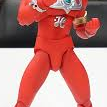

In [8]:
t = transforms.CenterCrop(int(torch.rand(1).item()*200+50))
trans_image = t(image)
trans_image

## データ変換関数の作成
以上を全部用いたデータ変換関数を準備する
- 既に述べたが、**データをロードする度に変換される**

- 訓練時と評価時ではデータ変換関数を変更している
  - 訓練時は汎化性能が上がるように RandomResizedCrop や RandomHorizontalFlip などデータ拡張する変換を用いる
  - 評価時はランダム性は入れずに入力画像のサイズがネットワークに合うようにサイズを変形する
  - ImageNetでは大きめ(256x256)にリサイズした後、中心部分の224x224を切り出すという手法を用いているため、それに従う
- Normalize()でImageNetの訓練データの平均と分散を用いて入力画像の画素値を平均0、分散1に正規化する
  - ImageNetにおいて、転移学習など、学習済のパラメタを使うときは、この変換を施す
  - 新たに加える画像の画素分布になるべく引っ張られないようにする

変換関数などについて、trainとevalで参照できるようにしている
- `data_transforms['train']()`:訓練画像用変換関数
- `data_transforms['val']()`: 評価画像用変換関数
  - ダウンロードしたデータセットが'train'と'val'という2つのフォルダに画像を保存しているため、これに倣っている

image_datasets: 画像データセット
- フォルダから画像をImageFolderで読み込んで画像データセットを作成する
- ImageFolderの第2引数にデータ変換用の関数を指定する


## ハイパーパラメタ

ここでは、バッチサイズとエポック数だけ指定する

簡単に変更できるので試してみると良い

In [9]:
batch_size = 64
num_epochs = 10

In [10]:
data_transforms = {
  'train': transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
  ]),
  'val': transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
  ]),
}

image_datasets = {x: datasets.ImageFolder("ultra", data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x],
                  batch_size=batch_size, shuffle=True, num_workers=4)
                  for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x])
                  for x in ['train', 'val']}
class_names = image_datasets['train'].classes
acc_list = {x: [] for x in ['train', 'val']}

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


## 訓練画像の可視化

- データ変換においてToTensor()でPyTorchのテンソル形式に変換されている
  - これまでもそうであったが、このままでは描画できない
  - そのでテンソルをnumpy()でndarrayに変換しなおしてから描画する
- 画素値を正則化しているため、逆演算(標準偏差を積算し平均を加算)し元に戻す

既におなじみと思われるが、`images.size()`として、バッチサイズ、チャネル(RGB)、画素x、画素y、さらにクラスのサイズが表示される
- ここでは、バッチサイズ数の画像が並ぶ
- また、次の'classes.size()として、バッチサイズ分のラベル値が表示される


torch.Size([64, 3, 224, 224]) torch.Size([64])


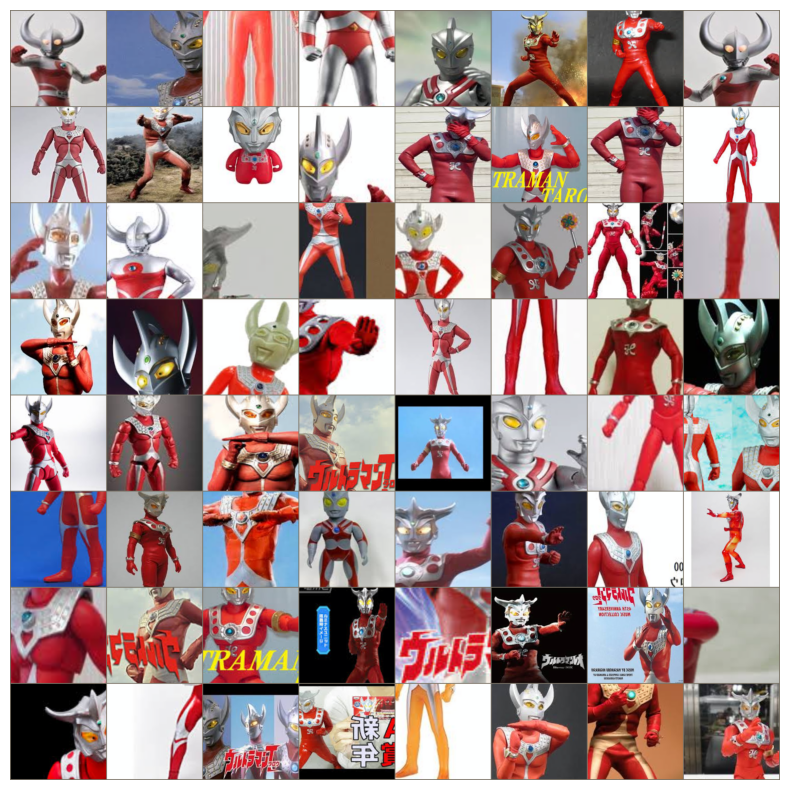

In [11]:
def imshow(images, title=None, size=10):
  images = images.numpy().transpose((1, 2, 0))
  mean = np.array([0.485, 0.456, 0.406])
  std = np.array([0.229, 0.224, 0.225])
  images = std * images + mean
  images = np.clip(images, 0, 1)
  plt.figure(figsize=(size,size))
  plt.imshow(images)
  plt.axis("off")
#  if title is not None:
#    plt.title(title)
images, classes = next(iter(dataloaders['train']))
print(images.size(), classes.size())
images = torchvision.utils.make_grid(images)
imshow(images, title=[class_names[x] for x in classes])

一応確認すると、画像の分類に対応する1次元テンソルが表示される

In [12]:
classes

tensor([1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0])

## 訓練用関数定義

- 各エポックは訓練`trainとバリデーションデータに対する評価`val`を行う
  - 一般にそれぞれ別に記述するが、共通部分が多いためまとめた記述となっている
- PyTorchのloss関数はデフォルト(size_average=True)では、ミニバッチのサンプルあたりの平均lossを返す
  - 実際その値を用いて逆伝播が計算される
  - running_loss はミニバッチの平均lossをミニバッチのサンプル数倍し、これを全部足し集めた後、全サンプル数で割ることでサンプル当たりの平均ロスとしている
    - これまで通り、ミニバッチ毎や、エポック毎といった評価でも問題ない

これまでとそれほど変わらないが、バリデーションデータでよい精度のモデルができるたびに自動的そのモデルを保存し、最終的に最高精度をたたき出すモデルを返す


In [13]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=num_epochs):
  since = time.time()
  epoch_loss = 0.0
  epoch_acc = 0.0
  best_model_wts = copy.deepcopy(model.state_dict())
  best_acc = 0.0
  for epoch in range(num_epochs):
    print('Epoch {}/{}'.format(epoch, num_epochs - 1))
    # 各エポックで訓練+バリデーションを実行
    for phase in ['train', 'val']:
      if phase == 'train':
        scheduler.step()
        model.train()
      else:
        model.eval()
      running_loss = 0.0
      running_corrects = 0
      for data in dataloaders[phase]:
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        # 順伝播
        if phase == 'train':
          outputs = model(inputs)
        else:
          with torch.no_grad():
            outputs = model(inputs)
        _, preds = torch.max(outputs.data, 1) #_は無視、データを捨てる
        loss = criterion(outputs, labels)
        if phase == 'train':
          loss.backward()
          optimizer.step()
        running_loss += loss.data.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
      epoch_loss = running_loss/dataset_sizes[phase]
      epoch_acc = running_corrects.item()/dataset_sizes[phase]
      print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))
      # よい精度のモデルを自動的に保存する、よくあるテクニック
      acc_list[phase].append(epoch_acc)
      if phase == 'val' and epoch_acc > best_acc:
        best_acc = epoch_acc
        best_model_wts = copy.deepcopy(model.state_dict())
  time_elapsed = time.time() - since
  print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed / 60, time_elapsed % 60))
  print('Best val acc: {:.4f}'.format(best_acc))
  model.load_state_dict(best_model_wts) #もっともよいモデルを読み直す
  return model

## 学習済みモデルの読み込みとFine-tuning

学習済みの大規模なネットワークとしてResNetを選択する
- ImageNetデータベースから読み込むことができるResNet-18を利用する。ResNet-18は深さが18層の畳み込みニューラルネットワークであり、100万枚を超えるイメージで学習させた事前学習済みのネットワークである。
- 出力層部分のみ2クラス分類になるように置き換えて、重みを固定せずに新規データで全層を再チューニングする方針を選択する

学習済みのResNet18をロードする

In [14]:
model_ft = models.resnet18(pretrained=True)
model_ft

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 211MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

本格的なResNetの構造は流石に巨大である

最終層の`fc`は出力がImageNetの1000クラス分類であるため、1000の出力がある
  - この部分を2クラスに置き換えれば利用できる

次のようにして置き換える
- 置き換え方は直観的にわかる通り、モデルのメソッドfcを指定しなおすだけ

ネットワークを表示させて、最後が置き換わっていることを確認する

In [15]:
num_features = model_ft.fc.in_features
# fc層を置き換える
model_ft.fc = nn.Linear(num_features, 2)
model_ft

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [16]:
model_ft = model_ft.to(device)
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# 7エポックごとに学習率を0.1倍する
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=num_epochs)
torch.save(model_ft.state_dict(), 'model_ft.pkl')
acc_list_ft = acc_list['val'].copy()
acc_list['val'] = []

Epoch 0/9


/usr/local/lib/python3.12/dist-packages/torch/optim/lr_scheduler.py:192: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


train Loss: 0.7154 Acc: 0.5547
val Loss: 0.6621 Acc: 0.6238
Epoch 1/9
train Loss: 0.5680 Acc: 0.7102
val Loss: 0.4707 Acc: 0.8119
Epoch 2/9
train Loss: 0.4712 Acc: 0.7985
val Loss: 0.3735 Acc: 0.8714
Epoch 3/9
train Loss: 0.4269 Acc: 0.8234
val Loss: 0.3006 Acc: 0.9136
Epoch 4/9
train Loss: 0.3519 Acc: 0.8695
val Loss: 0.2528 Acc: 0.9290
Epoch 5/9
train Loss: 0.3274 Acc: 0.8829
val Loss: 0.2219 Acc: 0.9309
Epoch 6/9
train Loss: 0.2942 Acc: 0.8887
val Loss: 0.2161 Acc: 0.9386
Epoch 7/9
train Loss: 0.2840 Acc: 0.9098
val Loss: 0.2142 Acc: 0.9347
Epoch 8/9
train Loss: 0.3205 Acc: 0.8810
val Loss: 0.2104 Acc: 0.9367
Epoch 9/9
train Loss: 0.3110 Acc: 0.8868
val Loss: 0.2141 Acc: 0.9482
Training complete in 1m 45s
Best val acc: 0.9482


## 学習済パラメタを固定

先ほどは重みを固定せずにResNet18の全レイヤの重みを更新対象にしていた
- その結果をメモしておこう

ここでは、全体をFine-tuningせず、最終層だけ重みを調整する

次のようにする
- `require_grad = False` として重みを固定する
- `optimizer`に更新対象のパラメータのみ渡す
  - `model_conv.parameters()`といった具合に固定パラメータを含めるとエラーとなる

先ほどよりも速く学習が進む
- GPUの威力で、それなりに速く求めてしまう……
- backwardの勾配計算を最終段のみ計算すればよいため
- 但し、lossを計算する必要があることから、forwardはすべて計算する

In [17]:
# 訓練済みResNet18をロード
model_conv = torchvision.models.resnet18(pretrained=True)
# 全パラメータを固定
for param in model_conv.parameters():
  param.requires_grad = False
# 最後のfc層を置き換える(requires_grad=Trueでありパラメータ更新の対象)
num_features = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_features, 2)
model_conv = model_conv.to(device)
criterion = nn.CrossEntropyLoss()
# Optimizerの第1引数には更新対象のfc層のパラメータのみ指定
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

In [18]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                       exp_lr_scheduler, num_epochs=num_epochs)
acc_list_tr = acc_list['val'].copy()

Epoch 0/9
train Loss: 0.7483 Acc: 0.5451
val Loss: 0.7193 Acc: 0.5681
Epoch 1/9
train Loss: 0.6352 Acc: 0.6353
val Loss: 0.5798 Acc: 0.6910
Epoch 2/9
train Loss: 0.5692 Acc: 0.7102
val Loss: 0.5014 Acc: 0.7889
Epoch 3/9
train Loss: 0.5207 Acc: 0.7620
val Loss: 0.4580 Acc: 0.8100
Epoch 4/9
train Loss: 0.4929 Acc: 0.7735
val Loss: 0.4304 Acc: 0.8157
Epoch 5/9
train Loss: 0.4587 Acc: 0.7927
val Loss: 0.4066 Acc: 0.8388
Epoch 6/9
train Loss: 0.4423 Acc: 0.8100
val Loss: 0.4041 Acc: 0.8330
Epoch 7/9
train Loss: 0.4409 Acc: 0.8081
val Loss: 0.4022 Acc: 0.8484
Epoch 8/9
train Loss: 0.4489 Acc: 0.8119
val Loss: 0.3984 Acc: 0.8426
Epoch 9/9
train Loss: 0.4436 Acc: 0.8196
val Loss: 0.3998 Acc: 0.8426
Training complete in 1m 36s
Best val acc: 0.8484


先程よりもよくなったであろうか？

- バッチサイズを変える
- 最適化手法を変える

などして、どちらがよくなるか、調べてみると良いであろう

なお、今回は10エポック程度でも十分であったといえるが、このように学習速度も速い

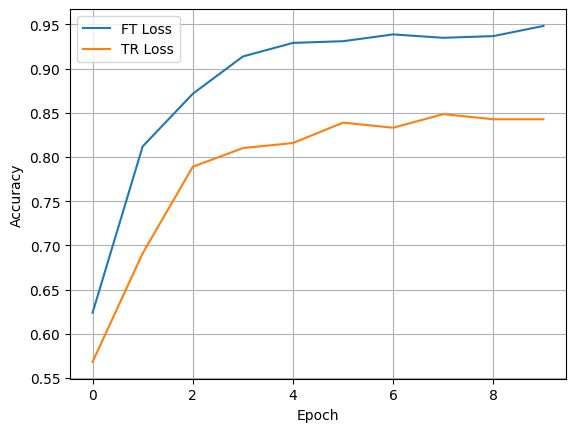

In [19]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(num_epochs), acc_list_ft, label='FT Loss')
plt.plot(range(num_epochs), acc_list_tr, label='TR Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()

## 分類結果の可視化

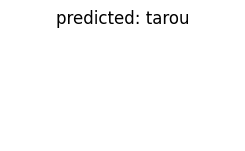

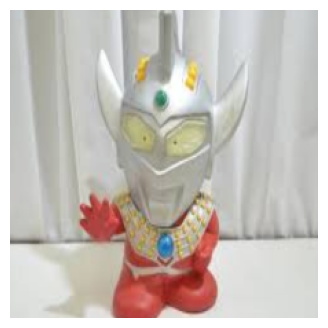

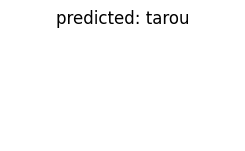

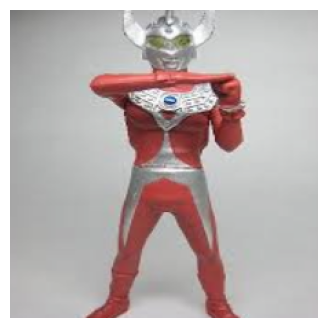

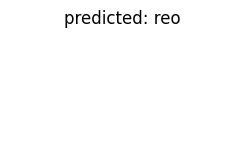

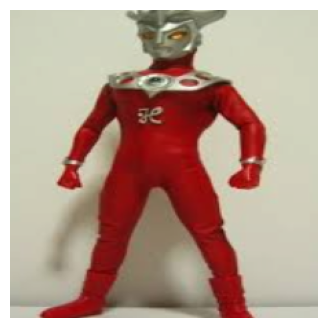

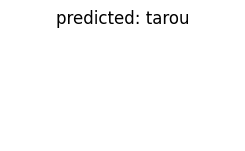

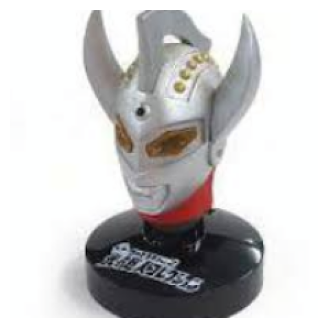

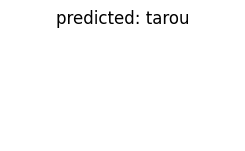

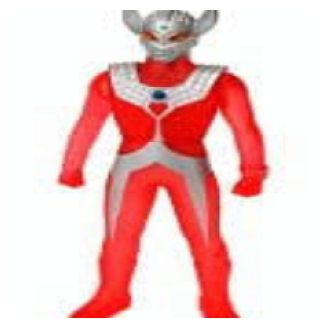

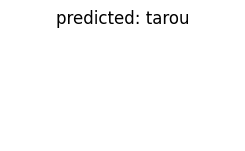

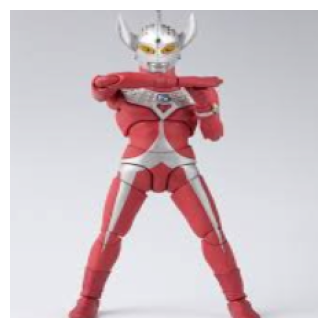

In [20]:
model_ft.load_state_dict(torch.load('model_ft.pkl', map_location=lambda storage, loc: storage))
def visualize_model(model, num_images=6):
  images_so_far = 0
  fig = plt.figure()
  model.eval()
  for i, data in enumerate(dataloaders['val']):
    inputs, labels = data
    inputs = inputs.cuda().to(device)
    inputs.requires_grad = False
    labels = labels.cuda().to(device)
    labels.requires_grad = False
    with torch.no_grad():
      outputs = model(inputs)
    _, preds = torch.max(outputs.data, 1)
    for j in range(inputs.size()[0]):
      images_so_far += 1
      plt.subplot(num_images // 2, 2, images_so_far)
      plt.axis('off')
      plt.title('predicted: {}'.format(class_names[preds[j]]))
      imshow(inputs.cpu().data[j], size=4)
      plt.show()
      if images_so_far == num_images:
        return
visualize_model(model_ft)

学習をGPUマシン行い、可視化や分析をCPUで行うことはよくある

最初にCPU用とGPU用、両方のモデルを保存するという方法があるが、上記のようにmap_locationを記述することで変更できる

その他の変更ルールは次を参考のこと

- CPU - > CPUやGPU - > GPU\
`torch.load('p.pth'）`

- CPU - > GPU1\
`torch.load('p.pth', map_location = lambda storage, loc: storage.cuda(1))`

- GPU1 - > GPU0\
`torch.load('p.pth', map_location = {'CUDA:1':'CUDA:0'})`

- GPU - > CPU\
`torch.load('p.pth', map_location = lambda storage, loc storage)`

新しいレイヤを作成して代入するだけなのですごく簡単にできる
- 結果的に2クラス分類である


# 課題1(出力変更)

2クラス分類であるから、出力層のユニット数を1にして活性化関数をsigmoid、Loss関数をbinary cross entropyにしてもよいだろうか、実際に実装して確認しなさい

# 課題2(分類)

イノシシと黒豚、月とスッポン、鳶と鷹など、似ていて非なるモノを用いて同様に分類しなさい
  - データセットは自分で作成すること
  - 判別率が65%を超えれば何でもい
  - 一般に似て非なるものを扱うこと

ネタに困ったら、過去に示した、
- ゴーカイジャーレッドとシンケンジャーレッドの分類  
https://class.west.sd.keio.ac.jp/dataai/data/red-of-gokai-shinken.zip
- 動物分類用データから任意の2つの動物を用いて分類  
https://class.west.sd.keio.ac.jp/dataai/data/pet-image.zip



# 課題3(多クラス分類)

動物分類用データから3つ以上の複数動物を用い、他クラス分類に転移学習しなさい

https://class.west.sd.keio.ac.jp/dataai/data/pet-image.zip
